In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import json
from tool import *
import matplotlib.pyplot as plt


data_root = '../../MyData/'

## Load data

In [2]:
concat_df = pd.read_csv('./mid_data/1_concat_clusters.csv')
concat_df = concat_df.drop('Year', axis=1)
concat_df = concat_df.rename(columns={
    'cluster_10': 'cluster_concat_10',
    'cluster_100': 'cluster_concat_100'
})

avg_df = pd.read_csv('./mid_data/2_avg_clusters.csv')
avg_df = avg_df.drop('Year', axis=1)
avg_df = avg_df.rename(columns={
    'cluster_10': 'cluster_avg_10',
    'cluster_100': 'cluster_avg_100'
})

pca_df = pd.read_csv('./mid_data/3_pca_clusters.csv')
pca_df = pca_df.drop('Year', axis=1)
pca_df = pca_df.rename(columns={
    'cluster_10': 'cluster_pca_10',
    'cluster_100': 'cluster_pca_100'
})

avg_auto_df = pd.read_csv('./mid_data/4_avg-auto_clusters.csv')
avg_auto_df = avg_auto_df.drop('Year', axis=1)
avg_auto_df = avg_auto_df.rename(columns={
    'cluster_10': 'cluster_avg_auto_10',
    'cluster_100': 'cluster_avg_auto_100'
})

concat_auto_df = pd.read_csv('./mid_data/4_concat-auto_clusters.csv')
concat_auto_df = concat_auto_df.drop('Year', axis=1)
concat_auto_df = concat_auto_df.rename(columns={
    'cluster_10': 'cluster_concat_auto_10',
    'cluster_100': 'cluster_concat_auto_100'
})

In [3]:
merged_df = pd.merge(avg_df, concat_df, how='left', on=['cik', 'tic'])
merged_df = pd.merge(merged_df, pca_df, how='left', on=['cik', 'tic'])
merged_df = pd.merge(merged_df, avg_auto_df, how='left', on=['cik', 'tic'])
merged_df = pd.merge(merged_df, concat_auto_df, how='left', on=['cik', 'tic'])
merged_df = merged_df.rename(columns={'cik': 'CIK'})

In [4]:
merged_df

,CIK,tic,cluster_avg_10,cluster_avg_100,cluster_concat_10,cluster_concat_100,cluster_pca_10,cluster_pca_100,cluster_avg_auto_10,cluster_avg_auto_100,cluster_concat_auto_10,cluster_concat_auto_100
0,850460,WIRE,2,31,NaN,NaN,NaN,NaN,9,54,NaN,NaN
1,352541,LNT,6,9,5.0,5.0,6.0,8.0,6,3,3.0,3.0
2,1704715,AMR,4,77,5.0,72.0,8.0,16.0,2,60,7.0,77.0
3,1575515,SFM,3,99,0.0,53.0,0.0,58.0,0,35,8.0,30.0
4,1125376,ENSG,7,54,4.0,55.0,9.0,87.0,7,42,6.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1021860,NOV,4,50,1.0,8.0,1.0,74.0,4,75,7.0,28.0
1193,1744489,DIS,0,32,2.0,60.0,3.0,68.0,7,49,6.0,51.0
1194,1102112,PACW,1,98,NaN,NaN,NaN,NaN,3,84,NaN,NaN
1195,28823,DBD,8,64,NaN,NaN,NaN,NaN,8,90,NaN,NaN


## test

In [5]:
dissimilar_df = pd.read_csv(data_root + "dissimilar_pairs_2021.csv")
similar_df = pd.read_csv(data_root + "pairs_gpt_competitors_2021.csv")

In [8]:
classification_columns = set(merged_df.columns) - {'CIK', 'tic'}
dissimilar_df_results = evaluate_all_classifications(dissimilar_df, merged_df, classification_columns)
similar_df_results = evaluate_all_classifications(similar_df, merged_df, classification_columns)


Missing CIKs in pairs dataset: 0 (company A), 0 (company B)
CIKs not found in main dataset: 0 (company A), 0 (company B)
Total valid pairs: 2913
Missing CIKs in pairs dataset: 0 (company A), 0 (company B)
CIKs not found in main dataset: 0 (company A), 0 (company B)
Total valid pairs: 2365


In [9]:
dissimilar_df_results.sort_values('Accuracy_Percentage')

,Classification_Scheme,Matching_Pairs,Valid_Pairs,Accuracy_Percentage,N_Industries,Avg_Firms_per_Industry
8,cluster_concat_100,1,2913,0.034329,100,9.26
3,cluster_pca_100,3,2913,0.102987,100,9.26
6,cluster_concat_auto_100,4,2913,0.137315,100,9.26
0,cluster_avg_100,5,2913,0.171644,100,11.97
5,cluster_avg_auto_100,17,2913,0.583591,100,11.97
4,cluster_pca_10,39,2913,1.338826,10,92.60
2,cluster_concat_10,69,2913,2.368692,10,92.60
7,cluster_concat_auto_10,74,2913,2.540336,10,92.60
9,cluster_avg_10,88,2913,3.020941,10,119.70
1,cluster_avg_auto_10,391,2913,13.422588,10,119.70


In [10]:
similar_df_results.sort_values('Accuracy_Percentage', ascending=False)

,Classification_Scheme,Matching_Pairs,Valid_Pairs,Accuracy_Percentage,N_Industries,Avg_Firms_per_Industry
9,cluster_avg_10,1931,2365,81.649049,10,119.70
1,cluster_avg_auto_10,1793,2365,75.813953,10,119.70
0,cluster_avg_100,1395,2365,58.985201,100,11.97
2,cluster_concat_10,1321,2365,55.856237,10,92.60
4,cluster_pca_10,1298,2365,54.883721,10,92.60
7,cluster_concat_auto_10,1214,2365,51.331924,10,92.60
3,cluster_pca_100,910,2365,38.477801,100,9.26
5,cluster_avg_auto_100,894,2365,37.801268,100,11.97
8,cluster_concat_100,850,2365,35.940803,100,9.26
6,cluster_concat_auto_100,638,2365,26.976744,100,9.26


In [11]:
name = dissimilar_df_results['Classification_Scheme'].values
name

array(['cluster_avg_100', 'cluster_avg_auto_10', 'cluster_concat_10',
       'cluster_pca_100', 'cluster_pca_10', 'cluster_avg_auto_100',
       'cluster_concat_auto_100', 'cluster_concat_auto_10',
       'cluster_concat_100', 'cluster_avg_10'], dtype=object)

C:\Users\Xu Tongzhou\AppData\Local\Temp\ipykernel_20324\3135790877.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(names)).colors  # Use 'tab10' colormap for distinct colors


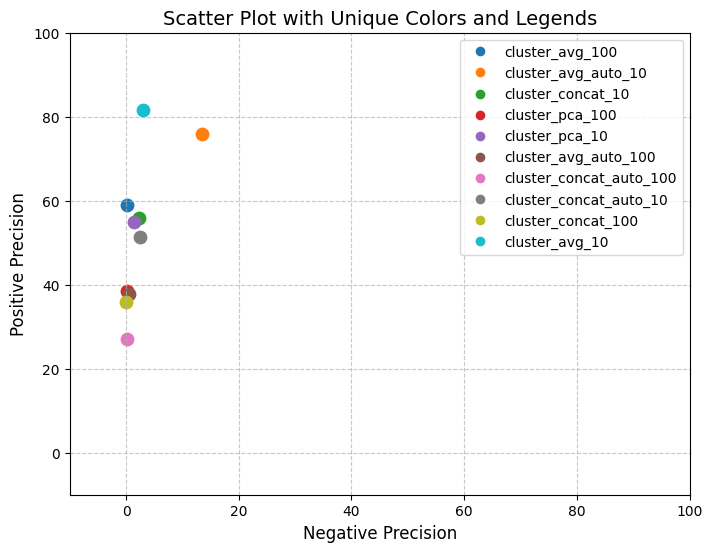

In [20]:
# Sample Data (Replace with your actual data)
possitive_prec = similar_df_results['Accuracy_Percentage']
negative_prec = dissimilar_df_results['Accuracy_Percentage']
names = dissimilar_df_results['Classification_Scheme'].values

# Generate a unique color for each point
colors = plt.cm.get_cmap('tab10', len(names)).colors  # Use 'tab10' colormap for distinct colors

# Create figure
plt.figure(figsize=(8, 6))

# Dictionary to track labels for legend
legend_labels = {}

# Plot each point separately with a unique color
for i, name in enumerate(names):
    color = colors[i % len(colors)]  # Cycle through colors if there are more points than colors
    plt.scatter(negative_prec[i], possitive_prec[i], color=color, label=name, s=80)
    
    # Add label to legend only if not already added
    if name not in legend_labels:
        legend_labels[name] = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8)

# Add title and labels
plt.title('Scatter Plot with Unique Colors and Legends', fontsize=14)
plt.ylabel('Positive Precision', fontsize=12)
plt.xlabel('Negative Precision', fontsize=12)

# Show legend
plt.legend(handles=legend_labels.values(), labels=legend_labels.keys(), loc='best')

plt.xlim(-10, 100)  # Set x-axis range from 0 to 100
plt.ylim(-10, 100)  # Set y-axis range from 0 to 100

# Show grid and plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
